# Loading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2

In [2]:
runs = pd.read_csv("../data/runs.csv")
runs.head()

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
0,0,1,3917,10,0.0,8.00,3,AUS,Gelding,60,...,21.59,23.86,24.62,NaN,NaN,83.92,9.7,3.7,118,2
1,0,2,2157,8,0.0,5.75,3,NZ,Gelding,60,...,21.99,23.30,23.70,NaN,NaN,83.56,16.0,4.9,164,57
2,0,3,858,7,0.0,4.75,3,NZ,Gelding,60,...,21.59,23.90,24.22,NaN,NaN,83.40,3.5,1.5,137,18
3,0,4,1853,9,0.0,6.25,3,SAF,Gelding,60,...,21.83,23.70,24.00,NaN,NaN,83.62,39.0,11.0,80,59
4,0,5,2796,6,0.0,3.75,3,GB,Gelding,60,...,21.75,23.22,23.50,NaN,NaN,83.24,50.0,14.0,9,154


In [3]:
races = pd.read_csv('../data/races.csv')
races.head()

,race_id,date,venue,race_no,config,surface,distance,going,horse_ratings,prize,...,place_combination3,place_combination4,place_dividend1,place_dividend2,place_dividend3,place_dividend4,win_combination1,win_dividend1,win_combination2,win_dividend2
0,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,...,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN
1,1,1997-06-02,ST,2,A,0,1200,GOOD TO FIRM,40-15,485000.0,...,4.0,NaN,12.5,47.0,33.5,NaN,5,23.5,NaN,NaN
2,2,1997-06-02,ST,3,A,0,1400,GOOD TO FIRM,60-40,625000.0,...,13.0,NaN,23.0,23.0,59.5,NaN,11,70.0,NaN,NaN
3,3,1997-06-02,ST,4,A,0,1200,GOOD TO FIRM,120-95,1750000.0,...,10.0,NaN,14.0,24.5,16.0,NaN,5,52.0,NaN,NaN
4,4,1997-06-02,ST,5,A,0,1600,GOOD TO FIRM,60-40,625000.0,...,1.0,NaN,15.5,28.0,17.5,NaN,2,36.5,NaN,NaN


# Select features and data cleaning

In [4]:
runs_data = runs[['race_id', 'won', 'horse_age', 'horse_country', 'horse_type', 'horse_rating',
       'horse_gear', 'declared_weight', 'actual_weight', 'draw', 'win_odds',
       'place_odds', 'horse_id']]
runs_data.head()

,race_id,won,horse_age,horse_country,horse_type,horse_rating,horse_gear,declared_weight,actual_weight,draw,win_odds,place_odds,horse_id
0,0,0.0,3,AUS,Gelding,60,--,1020.0,133,7,9.7,3.7,3917
1,0,0.0,3,NZ,Gelding,60,--,980.0,133,12,16.0,4.9,2157
2,0,0.0,3,NZ,Gelding,60,--,1082.0,132,8,3.5,1.5,858
3,0,0.0,3,SAF,Gelding,60,--,1118.0,127,13,39.0,11.0,1853
4,0,0.0,3,GB,Gelding,60,--,972.0,131,14,50.0,14.0,2796


In [5]:
runs_data.shape

(79447, 13)

In [6]:
races_data = races[['race_id', 'venue', 'config', 'surface', 'distance', 'going', 'race_class', 'date']]
races_data.head()

,race_id,venue,config,surface,distance,going,race_class,date
0,0,ST,A,0,1400,GOOD TO FIRM,5,1997-06-02
1,1,ST,A,0,1200,GOOD TO FIRM,5,1997-06-02
2,2,ST,A,0,1400,GOOD TO FIRM,4,1997-06-02
3,3,ST,A,0,1200,GOOD TO FIRM,1,1997-06-02
4,4,ST,A,0,1600,GOOD TO FIRM,4,1997-06-02


In [7]:
races_data.shape

(6349, 8)

In [8]:
# merge the two datasets based on race_id column
df = pd.merge(runs_data, races_data)
df.head()

,race_id,won,horse_age,horse_country,horse_type,horse_rating,horse_gear,declared_weight,actual_weight,draw,win_odds,place_odds,horse_id,venue,config,surface,distance,going,race_class,date
0,0,0.0,3,AUS,Gelding,60,--,1020.0,133,7,9.7,3.7,3917,ST,A,0,1400,GOOD TO FIRM,5,1997-06-02
1,0,0.0,3,NZ,Gelding,60,--,980.0,133,12,16.0,4.9,2157,ST,A,0,1400,GOOD TO FIRM,5,1997-06-02
2,0,0.0,3,NZ,Gelding,60,--,1082.0,132,8,3.5,1.5,858,ST,A,0,1400,GOOD TO FIRM,5,1997-06-02
3,0,0.0,3,SAF,Gelding,60,--,1118.0,127,13,39.0,11.0,1853,ST,A,0,1400,GOOD TO FIRM,5,1997-06-02
4,0,0.0,3,GB,Gelding,60,--,972.0,131,14,50.0,14.0,2796,ST,A,0,1400,GOOD TO FIRM,5,1997-06-02


In [9]:
df.shape

(79447, 20)

In [10]:
# Display the columns that have the most missing values
df.isnull().sum().sort_values(ascending=False)

place_odds         3735
horse_country         2
horse_type            2
date                  0
actual_weight         0
won                   0
horse_age             0
horse_rating          0
horse_gear            0
declared_weight       0
draw                  0
race_class            0
win_odds              0
horse_id              0
venue                 0
config                0
surface               0
distance              0
going                 0
race_id               0
dtype: int64

The amount of rows for missing values is relatively small, therefore we decided to drop these rows.

In [11]:
df = df.dropna()
df.shape

(75710, 20)

# Model

## Preprocessing：First, we will apply some preprocessing methods like standardization or encoding

### categorical features

In [25]:
features_categorical = ['horse_country', 'horse_type',
                       'horse_gear','venue', 'config','going','surface','race_class']


In [26]:
def preprocess_categorical_features(X):   
    ''' Returns a new DataFrame with dummified columns'''
    df = X.copy()
    return pd.get_dummies(df.apply(lambda col: col.astype('category')))


In [27]:
preprocess_categorical_features(df[features_categorical])


,horse_country_ARG,horse_country_AUS,horse_country_BRZ,horse_country_CAN,horse_country_FR,horse_country_GB,horse_country_GER,horse_country_GR,horse_country_IRE,horse_country_ITY,...,race_class_0,race_class_1,race_class_2,race_class_3,race_class_4,race_class_5,race_class_6,race_class_11,race_class_12,race_class_13
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76706,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
76707,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
76708,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
76709,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### The numerical features of horse data

In [28]:
df.head()

,race_id,won,horse_age,horse_country,horse_type,horse_rating,horse_gear,declared_weight,actual_weight,draw,win_odds,place_odds,horse_id,venue,config,surface,distance,going,race_class,date
0,0,0.0,3,AUS,Gelding,60,--,1020.0,133,7,9.7,3.7,3917,ST,A,0,1400,GOOD TO FIRM,5,1997-06-02
1,0,0.0,3,NZ,Gelding,60,--,980.0,133,12,16.0,4.9,2157,ST,A,0,1400,GOOD TO FIRM,5,1997-06-02
2,0,0.0,3,NZ,Gelding,60,--,1082.0,132,8,3.5,1.5,858,ST,A,0,1400,GOOD TO FIRM,5,1997-06-02
3,0,0.0,3,SAF,Gelding,60,--,1118.0,127,13,39.0,11.0,1853,ST,A,0,1400,GOOD TO FIRM,5,1997-06-02
4,0,0.0,3,GB,Gelding,60,--,972.0,131,14,50.0,14.0,2796,ST,A,0,1400,GOOD TO FIRM,5,1997-06-02


In [29]:
df.columns

Index(['race_id', 'won', 'horse_age', 'horse_country', 'horse_type',
       'horse_rating', 'horse_gear', 'declared_weight', 'actual_weight',
       'draw', 'win_odds', 'place_odds', 'horse_id', 'venue', 'config',
       'surface', 'distance', 'going', 'race_class', 'date'],
      dtype='object')

### Numerical features

In [30]:
features_numerical = ['horse_age','horse_rating', 'declared_weight',
                     'actual_weight','draw', 'win_odds', 'place_odds', 'distance']

In [31]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, StandardScaler

def preprocess_numerical_features(X):
    '''
    Returns a new DataFrame with
    - Missing values replaced by Column Mean
    - Features Standard Scaled
    - Original Features names kept in the DataFrame
    '''
    df = X.copy()
    
    # Scale feature
    ct = ColumnTransformer([], remainder=StandardScaler())
    tmp = ct.fit_transform(df)
    # keep feature names
    for (col_index, col_name) in enumerate(list(df.columns)):
        df[col_name] = tmp[:, col_index]
    return df

In [32]:
preprocess_numerical_features(df[features_numerical])

,horse_age,horse_rating,declared_weight,actual_weight,draw,win_odds,place_odds,distance
0,-0.354174,-0.090872,-1.355572,1.629233,0.032257,-0.634964,-0.421966,-0.071189
1,-0.354174,-0.090872,-1.997117,1.629233,1.366032,-0.425793,-0.285965,-0.071189
2,-0.354174,-0.090872,-0.361177,1.470740,0.299012,-0.840815,-0.671301,-0.071189
3,-0.354174,-0.090872,0.216214,0.678275,1.632787,0.337847,0.405373,-0.071189
4,-0.354174,-0.090872,-2.125426,1.312247,1.899542,0.703067,0.745375,-0.071189
...,...,...,...,...,...,...,...,...
76706,0.854068,0.360228,0.585103,-1.065148,-0.768009,0.138637,-0.195298,-0.071189
76707,3.270552,0.270008,-0.617795,-2.016106,-0.234499,2.329953,0.745375,-0.071189
76708,-0.354174,0.179788,0.168098,-2.174599,1.899542,-0.684767,-0.614633,-0.071189
76709,0.854068,0.179788,1.210609,-0.906655,0.032257,1.001882,0.280705,-0.071189


### Concatenation of preprocess data

In [34]:
data_preprocessed = pd.concat(
    [
        df[['won']],
        preprocess_numerical_features(df[features_numerical]),
        preprocess_categorical_features(df[features_categorical])
    ], axis=1)
data_preprocessed.shape
data_preprocessed.head()

,won,horse_age,horse_rating,declared_weight,actual_weight,draw,win_odds,place_odds,distance,horse_country_ARG,...,race_class_0,race_class_1,race_class_2,race_class_3,race_class_4,race_class_5,race_class_6,race_class_11,race_class_12,race_class_13
0,0.0,-0.354174,-0.090872,-1.355572,1.629233,0.032257,-0.634964,-0.421966,-0.071189,0,...,0,0,0,0,0,1,0,0,0,0
1,0.0,-0.354174,-0.090872,-1.997117,1.629233,1.366032,-0.425793,-0.285965,-0.071189,0,...,0,0,0,0,0,1,0,0,0,0
2,0.0,-0.354174,-0.090872,-0.361177,1.470740,0.299012,-0.840815,-0.671301,-0.071189,0,...,0,0,0,0,0,1,0,0,0,0
3,0.0,-0.354174,-0.090872,0.216214,0.678275,1.632787,0.337847,0.405373,-0.071189,0,...,0,0,0,0,0,1,0,0,0,0
4,0.0,-0.354174,-0.090872,-2.125426,1.312247,1.899542,0.703067,0.745375,-0.071189,0,...,0,0,0,0,0,1,0,0,0,0


### Distribution of labels of 'Won'

Text(0.5, 1.0, 'Number of Labels by Class')

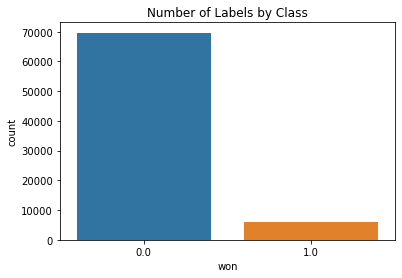

In [35]:
plt.figure(figsize=(6,4))
sns.countplot(data=data_preprocessed, x='won')
plt.title('Number of Labels by Class')

## Split Dataset: split the data in two sets: a training set and a testing set.

In [38]:
# Create a smaller dataset for investigation purpose only
sample_size = 10000
tmp = data_preprocessed.sample(sample_size, random_state=414)
X_small = tmp.drop(columns=['won'])
y_small = tmp['won']

In [39]:
# Create X and y
X = data_preprocessed.drop(columns=['won'])
y = data_preprocessed['won']
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=414)
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X_small, y_small, random_state=414)


## Modeling

In [40]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

### Baseline and performance metrics

### DummyClassifier

Here we can use the DummyClassifier to always predict “not win” as a baseline model because we know that there are much more "not winner" than "winner" in our dataset

In [50]:
# DummyClassifier to predict only target 0
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# checking accuracy
print('classification_report of DummyClassifier: ')

print(classification_report(y_test, dummy_pred))

classification_report of DummyClassifier: 
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     17399
         1.0       0.00      0.00      0.00      1529

    accuracy                           0.92     18928
   macro avg       0.46      0.50      0.48     18928
weighted avg       0.84      0.92      0.88     18928



/Users/sing/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sing/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sing/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We got an accuracy score of 92% without training a model. **Accuracy** is the ratio of correct predictions. 
 - A𝑐𝑐𝑢𝑟𝑎𝑐𝑦 = (𝑇𝑃+𝑇𝑁) / 𝑛

### logistic regression 
-  compare logistic regression with DummyClassifier

In [51]:
# Modeling the data as is
# Train model
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
 
# Predict on training set
lr_pred = lr.predict(X_test)

# Checking accuracy
print('classification_report of LogisticRegression: ')

print(classification_report(y_test, lr_pred))

classification_report of LogisticRegression: 
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     17399
         1.0       0.00      0.00      0.00      1529

    accuracy                           0.92     18928
   macro avg       0.46      0.50      0.48     18928
weighted avg       0.84      0.92      0.88     18928



/Users/sing/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sing/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sing/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Our accuracy score is the same as compared to the dummy classifier above. This tells us that accuracy might not be our best option for measuring performance.

In such an unbalanced problem, accuracy is meaningless: A very dumb model predicting always zeros would have great accuracy, to the detriment of the predictive power of class 1, which has **precision** and **recall** equal to zero!


- **Precision** measures the ability of a model to avoid false positives for a class. This is the number of true positives divided by all positive predictions.

 - P𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛 = 𝑇𝑃 / 𝑇𝑃 + 𝐹𝑃
 
- **Recall** measures the ability of the model to detect occurences of a class. This is the number of true positives divided by the number of positive values in the test data.
 - R𝑒𝑐𝑎𝑙𝑙 = 𝑇𝑃 / 𝑇𝑃 + 𝐹𝑁

💡 **F1_score**, which is the weighted average of precision and recall, would be a good measure for this type of problem.

### Random Forest Classifier

- Then to train a Random Forest Classifier for our prediction. First, I use the default hyperparameters

In [45]:
%%time
# Simple Random Forest
forest = RandomForestClassifier(class_weight='balanced')
forest.fit(X_train, y_train)


CPU times: user 18.5 s, sys: 427 ms, total: 18.9 s
Wall time: 19.2 s


RandomForestClassifier(class_weight='balanced')

In [46]:
%%time
y_pred = forest.predict(X_test)


CPU times: user 581 ms, sys: 72.2 ms, total: 653 ms
Wall time: 658 ms


In [54]:
print('classification_report of Random Forest Classifier: ')
print(classification_report(y_test, y_pred))


classification_report of Random Forest Classifier: 
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     17399
         1.0       0.39      0.01      0.02      1529

    accuracy                           0.92     18928
   macro avg       0.65      0.50      0.49     18928
weighted avg       0.88      0.92      0.88     18928



**Precision** is now higher at 22% but overall we succeed to predict only 21 winners which is low.

**F1_score** improved slightly from our baseline score (48% --> 49%)

## Forest-based most important features

We can use the Random Forest Classifier in order to find what are the most important features in our prediction

In [45]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(class_weight='balanced', max_depth=30, 
                                min_samples_split=5, min_samples_leaf=1, n_estimators=800, 
                                criterion='gini', bootstrap=True)
forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=30,
                       min_samples_split=5, n_estimators=800)

(0.0, 100.0)

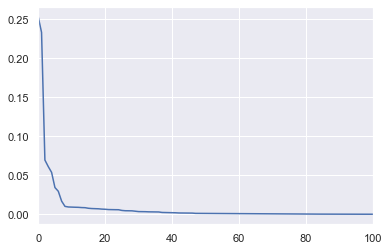

In [46]:
plt.plot(np.sort(forest.feature_importances_)[::-1])
plt.xlim(xmax=100, xmin=0)

In [48]:
# Top 12 features
features_top_12 = pd.DataFrame(zip(forest.feature_importances_, list(X_train.columns))  
                              ).sort_values(by=0, ascending=False)[:12]
features_top_12.reset_index()

,index,0,1
0,5,0.253165,win_odds
1,6,0.233147,place_odds
2,2,0.069628,declared_weight
3,3,0.061289,actual_weight
4,4,0.053858,draw
5,7,0.034413,distance
6,1,0.029656,horse_rating
7,0,0.016981,horse_age
8,801,0.010291,going_GOOD
9,9,0.009527,horse_country_AUS


In [49]:
features_top_12.reset_index(drop=True).rename(columns={0: 'Feature_importances', 1: "Top 12 features"})

,Feature_importances,Top 12 features
0,0.253165,win_odds
1,0.233147,place_odds
2,0.069628,declared_weight
3,0.061289,actual_weight
4,0.053858,draw
5,0.034413,distance
6,0.029656,horse_rating
7,0.016981,horse_age
8,0.010291,going_GOOD
9,0.009527,horse_country_AUS


**Conclusion:** We have run a model that allows us to predict correclty 871 winners.

We may have better results with other models (SGDClassifier, AdaBoost, KNNClassifier, etc.). 

We may also have better results with resampling techniques: Oversample minority class or Undersample majority class